In [1]:
#Import all Necessary Libraries
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, Lambda, MaxPooling2D, Flatten, BatchNormalization, Dense
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import save_model
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.datasets import fetch_openml
from tensorflow.keras.callbacks import EarlyStopping
import pickle
import numpy as np
import pandas as pd
import os
os.environ['KMP_DUPLICATE_LIB_OK']='True'

# batch size and number of epochs
BATCH_SIZE = 32
EPOCHS = 2

In [2]:
#importing dataset, 28x28 images of digits 
mnist = fetch_openml('mnist_784')

#unpacking data
X , y = mnist.data, mnist.target

# converting string into int
y = y.astype(np.short)


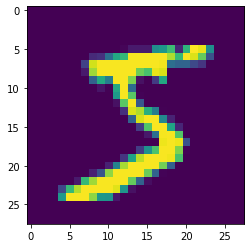

Number: 5


In [3]:
plt.imshow(X[0].reshape(28,28))
plt.show()
print("Number: {}".format(y[0]))

In [4]:
# Reshape image in 3 dimensions
# canal = 1 for gray scale
X = X.reshape(-1,28,28,1)

In [5]:
# Scaling numbers [0,1], normalization
X = tf.keras.utils.normalize(X, axis = 1)

In [6]:
# Split the train and the test set
X_train, X_test, y_train, y_test = train_test_split(X,y ,test_size=0.3, random_state = 42)

In [7]:
early_stopping_monitor = EarlyStopping(
    monitor='val_loss',
    min_delta=0,
    patience=0,
    verbose=0,
    mode='auto',
    baseline=None,
    restore_best_weights=True
)

# Sequential Model
model =tf.keras.models.Sequential()
model.add(Conv2D(filters=64, kernel_size=3, input_shape = (28,28,1), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(filters=32, kernel_size = 3, activation='relu'))
model.add(Flatten())
model.add(BatchNormalization())
model.add(Dense(128,activation="relu"))
model.add(tf.keras.layers.Dense(10, activation=tf.nn.softmax))
model.compile(optimizer = 'adam',
              loss = 'sparse_categorical_crossentropy',
              metrics = ['accuracy'], 
              callbacks=[early_stopping_monitor],)

In [8]:
# Training model
model.fit(X_train, y_train,batch_size=BATCH_SIZE,
          epochs=EPOCHS, validation_split=0.2)


Train on 39200 samples, validate on 9800 samples
Epoch 1/2
39200/39200 [==============================] - 84s 2ms/sample - loss: 0.1321 - accuracy: 0.9595 - val_loss: 0.1046 - val_accuracy: 0.9722
Epoch 2/2
39200/39200 [==============================] - 86s 2ms/sample - loss: 0.0564 - accuracy: 0.9821 - val_loss: 0.0676 - val_accuracy: 0.9800


In [10]:
#Saving model to json file
model.save('my_model.h5')